Import basic packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text formatting class for readability of print outputs

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Function to load file as a numpy array:

In [3]:
# load a single txt file as a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

Load training data and print data shape

In [4]:
train_sub_map = load_file("~/Desktop/UCI HAR Dataset/train/subject_train.txt")
trainX = load_file("~/Desktop/UCI HAR Dataset/train/X_train.txt")
trainy = load_file("~/Desktop/UCI HAR Dataset/train/y_train.txt")
print(train_sub_map.shape)
print(trainX.shape)
print(trainy.shape)

(7352, 1)
(7352, 561)
(7352, 1)


Load test data and print data shape

In [5]:
test_sub_map = load_file("~/Desktop/UCI HAR Dataset/test/subject_test.txt")
testX = load_file("~/Desktop/UCI HAR Dataset/test/X_test.txt")
testy = load_file("~/Desktop/UCI HAR Dataset/test/y_test.txt")
print(test_sub_map.shape)
print(testX.shape)
print(testy.shape)

(2947, 1)
(2947, 561)
(2947, 1)


Need to use ravel for the y data to get it as a 1D array

In [6]:
print(type(trainy))
print(trainy.ravel().shape)

<class 'numpy.ndarray'>
(7352,)


Tested logistic regression model on the data

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# instantiate logistic regression
# pass default solver 'lbfgs', large # of max iteration, and auto multi-class
lr = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='auto')
# fit the model to the training data
lr.fit(trainX, trainy.ravel())

# predict train y values and test y values
lr_train_pred_y = lr.predict(trainX)
lr_test_pred_y = lr.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on lr_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), lr_train_pred_y))
print(color.BOLD + 'Classification report on lr_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), lr_test_pred_y))

Classification report on lr_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on lr_test_pred_y:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.97      0.94      0.96       471
           3       0.99      0.97      0.98       420
           4       0.98      0.88      0.93       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00      

Tested K nearest neighbors classifier on data

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
# fit the model to the training data
knn.fit(trainX, trainy.ravel())

# predict train y values and test y values
knn_train_pred_y = knn.predict(trainX)
knn_test_pred_y = knn.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on knn_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), knn_train_pred_y))
print(color.BOLD + 'Classification report on knn_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), knn_test_pred_y))

Classification report on knn_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      0.99      1.00       986
           4       0.97      0.93      0.95      1286
           5       0.94      0.97      0.96      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352

Classification report on knn_test_pred_y:
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.90      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.80      0.85       491
           5       0.84      0.93      0.89       532
           6       1.00      0.99      1.00    

One vs rest classifier

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
trainy_bin = label_binarize(trainy, classes=[1,2,3,4,5,6])
testy_bin = label_binarize(testy, classes=[1,2,3,4,5,6])
# now we have one binary column for each class instead of one column with many class names

# instantiate one vs rest classifier
ovr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# Learn to predict each class against the other
y_score = ovr.fit(trainX, trainy_bin).decision_function(testX)

Just to check shape of binarized y values for train and test datasets

In [10]:
print(trainy_bin.shape[1])
print(testy_bin.shape[1])

6
6


Evaluate one vs rest classifier with ROC curve and precision-recall curve

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# get number of unique classes
n_classes = trainy_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

precision = {}
recall = {}
pr_auc = {}

# we calculate 10 curves, one for each class
for i in range(n_classes):
    # ROC:
    fpr[i], tpr[i], _ = roc_curve(testy_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-recall:
    precision[i], recall[i], _ = precision_recall_curve(testy_bin[:, i], y_score[:, i])
    pr_auc[i] = average_precision_score(testy_bin[:, i], y_score[:, i])

ROC curve for activity #0 (walking)

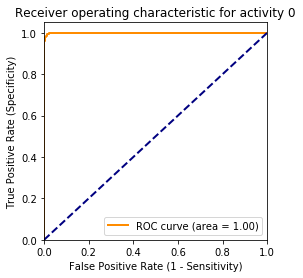

In [12]:
activity = 0

plt.figure(figsize=(4,4))
plt.plot(fpr[activity], tpr[activity], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[activity])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic for activity ' + str(activity))
plt.legend(loc="lower right")
plt.show()

Precision-recall curve for activity #0 (walking)

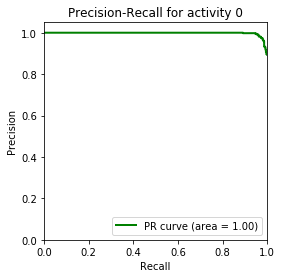

In [13]:
# Plot only one Precision-Recall curve for selected class
activity = 0

plt.figure(figsize=(4,4))
plt.plot(recall[activity], precision[activity], color='green',
         lw=2, label='PR curve (area = %0.2f)' % pr_auc[activity])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for activity ' + str(activity))
plt.legend(loc="lower right")
plt.show()

One vs rest classifier take 2

In [14]:
# instantiate one vs rest classifier
ovr1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# Learn to predict each class against the other
ovr1.fit(trainX, trainy.ravel())

# predict train y values and test y values
ovr1_train_predy = ovr1.predict(trainX)
ovr1_test_predy = ovr1.predict(testX)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy, ovr1_test_predy)

array([[496,   0,   0,   0,   0,   0],
       [ 19, 451,   1,   0,   0,   0],
       [  3,   5, 412,   0,   0,   0],
       [  0,   4,   0, 427,  59,   1],
       [  1,   0,   0,  11, 520,   0],
       [  0,   0,   0,   0,   0, 537]])

Classification report for one vs rest classifier

In [16]:
# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on ovr1_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), ovr1_train_predy))
print(color.BOLD + 'Classification report on ovr1_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), ovr1_test_predy))

Classification report on ovr1_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on ovr1_test_pred_y:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00  

Multinomial naive bays applied to multiclass problem. Evaluated with stratified K-fold cross-validation

First combine test and train datasets

In [17]:
concat_sub_map = np.concatenate((train_sub_map, test_sub_map), axis=None)
concat_X = np.concatenate((trainX, testX), axis=0)
concat_y = np.concatenate((trainy, testy), axis=None)
print(concat_sub_map.shape)
print(concat_X.shape)
print(concat_y.shape)

(10299,)
(10299, 561)
(10299,)


In [18]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Instantiate k fold cross-validator 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Instantiate RF classifier 
rf = RandomForestClassifier()

Changing min_samples_leaf and min_samples_split doesn't change much. Even changing n_estimators doesn't change much. Changing max_depth changes a lot though.

In [20]:
# Instantiate grid search with 4 hyperparameters 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 4),
     "n_estimators": range(2, 5), 
     "min_samples_leaf": range(1, 4),
     "min_samples_split": range(2, 5)},
    cv=kf, 
    n_jobs=-1
)
gscv.fit(concat_X, concat_y)

# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

# Create a heatmap-style table, use df.pivot_table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

Changing max_depth (levels of tree) improves classification score more than changing n_estimators (number of trees)

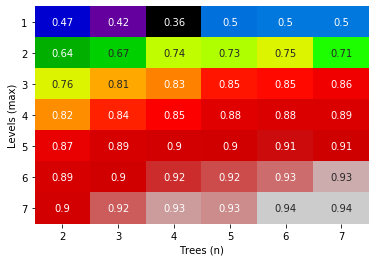

In [21]:
# rf and kf already instantiated

# Instantiate grid search with 2 hyperparameters
gscv1 = GridSearchCV(
    rf, 
    {"max_depth": range(1, 8), "n_estimators": range(2, 8)}, 
    cv=kf, 
    n_jobs=-1
)
gscv1.fit(concat_X, concat_y)

# Get cross-validation data
cv1_df = pd.DataFrame(gscv1.cv_results_)

# Pivot table
pivoted_df = cv1_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)

# Create a heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivoted_df,
            cmap="nipy_spectral",
            cbar=False,
            annot=True)
plt.xlabel('Trees (n)')
plt.ylabel('Levels (max)')
# plt.xticks(size=14)
plt.yticks(rotation=0);

In [18]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Instantiate k fold cross-validator 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Instantiate RF classifier 
rf = RandomForestClassifier()

Changing min_samples_leaf and min_samples_split doesn't change much. Even changing n_estimators doesn't change much. Changing max_depth changes a lot though.

In [20]:
# Instantiate grid search with 4 hyperparameters 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 4),
     "n_estimators": range(2, 5), 
     "min_samples_leaf": range(1, 4),
     "min_samples_split": range(2, 5)},
    cv=kf, 
    n_jobs=-1
)
gscv.fit(concat_X, concat_y)

# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

# Create a heatmap-style table, use df.pivot_table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

Gradient boosting regressor seems to be worse than random forest regressor. Need a lot of estimators to get a good model.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# kf already instantiated

# instantiate gradient boosting classifier
gbr = GradientBoostingClassifier()

# Instantiate grid search with 2 hyperparameters
gscv2 = GridSearchCV(
    gbr, 
    {"max_depth": range(1, 6), "n_estimators": range(2, 10)}, 
    cv=kf, 
    n_jobs=-1
)
gscv2.fit(concat_X, concat_y)

# Get cross-validation data
cv2_df = pd.DataFrame(gscv2.cv_results_)

# Create a heatmap-style table, use df.pivot bc only 2 hyperparameters
piv_df1 = cv2_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df1.style.background_gradient("nipy_spectral", axis=None)

/Users/hayaw/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


param_n_estimators,2,3,4,5,6,7,8,9
param_max_depth,,,,,,,,
1,0.754,0.783,0.815,0.824,0.842,0.861,0.872,0.873
2,0.856,0.887,0.899,0.903,0.907,0.911,0.918,0.919
3,0.906,0.919,0.924,0.93,0.933,0.934,0.936,0.938
4,0.915,0.93,0.935,0.94,0.942,0.946,0.947,0.948
5,0.927,0.938,0.948,0.951,0.953,0.955,0.959,0.959


Find best hyperparameters (number of neighbors) for the KNN classifier. Turns out the optimal number of neighbors is 3 and it provides a classification accuracy of 97%

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score

X = concat_X
y = concat_y

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# print(len(tuple(sss.split(X, y))))
train_index, test_index = tuple(sss.split(X, y))[0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

knn = KNeighborsClassifier()

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [3, 5, 7, 9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
g = GridSearchCV(knn, p_grid, cv=cv)

g.fit(X, y)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = KNeighborsClassifier(n_neighbors = best['n_neighbors']) 
knn.fit(X_train, y_train)

print('Accuracy:', accuracy_score(y_test, knn.predict(X_test)))


GridSearch found optimal number of neighbors: 3
Mean CV test scores are: [0.96922031 0.96727838 0.96601612 0.96387999]
Accuracy: 0.9728155339805825


Try Naive Bayes classifier

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import pprint

# instantiate Naive Bayes classifier 
nb = GaussianNB()
# Instantiate statrified k fold cross-validator
cv = StratifiedKFold(n_splits=5)

# evaluate
scores = cross_validate(nb, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)

pprint.pprint(scores)
print()
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

{'fit_time': array([0.11845303, 0.09426403, 0.0987761 , 0.09260821, 0.08480477]),
 'score_time': array([0.04980874, 0.04144001, 0.0426228 , 0.04141593, 0.04022312]),
 'test_accuracy': array([0.73485216, 0.71906841, 0.70422535, 0.75327829, 0.79193   ]),
 'test_f1_micro': array([0.73485216, 0.71906841, 0.70422535, 0.75327829, 0.79193   ]),
 'train_accuracy': array([0.74757164, 0.76584122, 0.76978155, 0.71262136, 0.79046348]),
 'train_f1_micro': array([0.74757164, 0.76584122, 0.76978155, 0.71262136, 0.79046348])}

mean TRAIN accuracy:  0.76
mean TEST  accuracy:  0.74


Try svm one vs rest classifier

In [25]:
# instantiate one vs rest classifier
ovr1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

# fit the model to the training data
ovr1.fit(trainX, trainy.ravel())

# predict train y values and test y values
ovr1_train_pred_y = ovr1.predict(trainX)
ovr1_test_pred_y = ovr1.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on ovr1_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), ovr1_train_pred_y))
print(color.BOLD + 'Classification report on ovr1_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), ovr1_test_pred_y))

Classification report on ovr1_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on ovr1_test_pred_y:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00  

In [26]:
# Instantiate stratified k fold cross-validator
cv = StratifiedKFold(n_splits=5)

# evaluate
scores = cross_validate(ovr1, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)
# show scores
pprint.pprint(scores)
print()
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

{'fit_time': array([50.72462726, 48.96300697, 53.90254068, 52.56996703, 51.55575109]),
 'score_time': array([2.65480089, 2.61417508, 2.91036415, 2.80582571, 2.72258306]),
 'test_accuracy': array([0.95540475, 0.93449782, 0.9839728 , 0.97231666, 0.97228974]),
 'test_f1_micro': array([0.95540475, 0.93449782, 0.9839728 , 0.97231666, 0.97228974]),
 'train_accuracy': array([0.99247207, 0.99150279, 0.99199029, 0.99235437, 0.9930842 ]),
 'train_f1_micro': array([0.99247207, 0.99150279, 0.99199029, 0.99235437, 0.9930842 ])}

mean TRAIN accuracy:  0.99
mean TEST  accuracy:  0.96


In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape

(569, 30)